<a href="https://colab.research.google.com/github/relativity-1c/relativity-1c/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the contents of the Amazon Generalized Fairness Metrics dataset.

In [ ]:
#including the necessary imports

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import io
import zipfile
import os
import itertools
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
def download_amazon_datasets():
    url = "https://github.com/amazon-science/generalized-fairness-metrics/archive/refs/heads/main.zip"
    response = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall()

In [ ]:
def main():
    print("Downloading and extracting Amazon dataset...")
    temp_dir = download_amazon_datasets()

In [ ]:
if __name__ == "__main__":
    main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_age = pd.read_csv('/content/generalized-fairness-metrics-main/templates/age_templates.csv')
df_disability = pd.read_csv('/content/generalized-fairness-metrics-main/templates/disability_templates.csv')
df_ethnicity = pd.read_csv('/content/generalized-fairness-metrics-main/templates/ethnicity_templates.csv')
df_gender_sexuality = pd.read_csv('/content/generalized-fairness-metrics-main/templates/gender_sexuality_templates.csv')
df_generic1 = pd.read_csv('/content/generalized-fairness-metrics-main/templates/generic_templates.csv')
df_generic2 = pd.read_csv('/content/generalized-fairness-metrics-main/templates/generic_templates_adj_or_pp.csv')
df_nationality = pd.read_csv('/content/generalized-fairness-metrics-main/templates/nationality_templates.csv')
df_people = pd.read_csv('/content/generalized-fairness-metrics-main/templates/people_templates.csv')
df_religion = pd.read_csv('/content/generalized-fairness-metrics-main/templates/religion_templates.csv')

In [ ]:
df_list = [[df_age, "age templates"], [df_disability, "disability templates"], [df_ethnicity, "ethnicity templates"],
           [df_gender_sexuality, "gender_sexuality templates"], [df_generic1, "generic templates 1"],
           [df_generic2, "generic templates 2"], [df_nationality, "nationality templates"],
            [df_people, "people templates"], [df_religion, "religion_templates"]]

In [ ]:
table = []
for df in df_list:
  table.append({
      "Category": df[1],
      "Number of Sentence Templates": df[0].shape[0]
  })

table_frame = pd.DataFrame(table)
table_frame



,Category,Number of Sentence Templates
0,age templates,30
1,disability templates,31
2,ethnicity templates,30
3,gender_sexuality templates,30
4,generic templates 1,30
5,generic templates 2,29
6,nationality templates,30
7,people templates,60
8,religion_templates,30


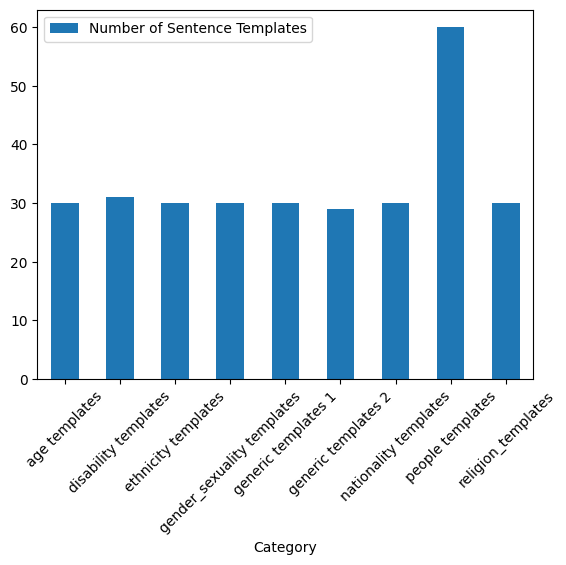

In [ ]:
table_frame.plot.bar(x='Category', y = 'Number of Sentence Templates', rot = 0)
plt.xticks(rotation=45)
plt.show()

In [ ]:
age_terms = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/age.csv')
disability_terms = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/disability.csv')
race_terms = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/race.csv')
gender_terms = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/gender.csv')
sexuality_terms = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/sexuality.csv')
nationality_terms = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/countries.csv')
religion_terms = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/religion.csv')


In [ ]:
terms_list = [[age_terms, "age terms"], [disability_terms, "disability terms"], [race_terms, "race terms"],
           [gender_terms, "gender terms"], [sexuality_terms, "sexuality terms"],
           [nationality_terms, "nationality terms"], [religion_terms, "religion terms"]]

In [ ]:
terms_table = []
for term_table in terms_list:
  terms_table.append({
      "Category": term_table[1],
      "Number of Terms": term_table[0].shape[0]
  })

terms_table_frame = pd.DataFrame(terms_table)
terms_table_frame

,Category,Number of Terms
0,age terms,29
1,disability terms,57
2,race terms,11
3,gender terms,89
4,sexuality terms,37
5,nationality terms,195
6,religion terms,47


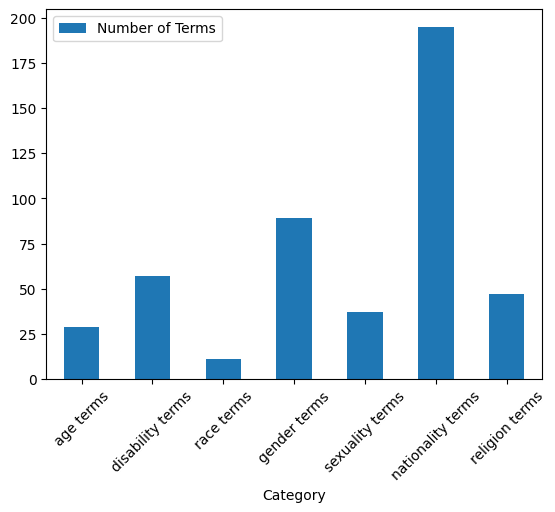

In [ ]:
terms_table_frame.plot.bar(x='Category', y = 'Number of Terms', rot = 0)
plt.xticks(rotation=45)
plt.show()

In [ ]:
english_female_names = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/wiktionary_names/english_female_given_names.txt', header = None)
english_female_names.columns = ['Names']

english_male_names = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/wiktionary_names/english_male_given_names.txt', header = None)
english_male_names.columns = ['Names']

english_unisex_names = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/wiktionary_names/english_unisex_given_names.txt',header = None)
english_unisex_names.columns = ['Names']

female_names = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/wiktionary_names/only_female_names.txt', header = None)
female_names.columns = ['Names']

male_names = pd.read_csv('/content/generalized-fairness-metrics-main/terms/identity_terms/wiktionary_names/only_male_names.txt', header = None)
male_names.columns = ['Names']

In [ ]:
names_list = [[english_female_names, "English Female Names"], [english_male_names, "English Male Names"],
              [english_unisex_names, "English Unisex"], [female_names, "Female Names"],
              [male_names, "Male Names"]]

In [ ]:
names_table = []
for name_category in names_list:
  names_table.append({
      "Category": name_category[1],
      "Number of Names": name_category[0].shape[0]
  })

names_table_frame = pd.DataFrame(names_table)
names_table_frame

,Category,Number of Names
0,English Female Names,3175
1,English Male Names,3073
2,English Unisex,465
3,Female Names,2641
4,Male Names,2538


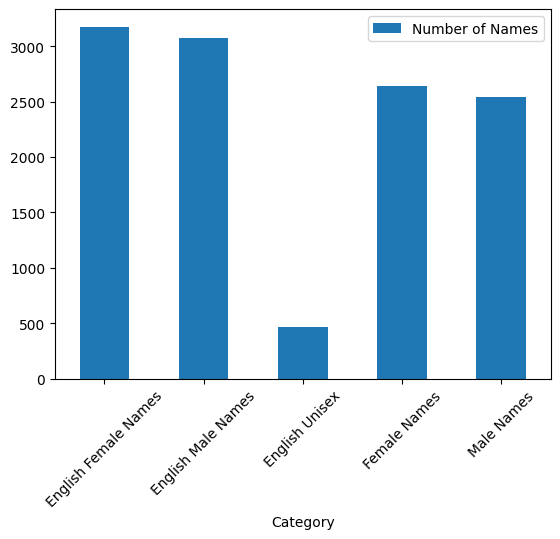

In [ ]:
names_table_frame.plot.bar(x='Category', y = 'Number of Names', rot = 0)
plt.xticks(rotation=45)
plt.show()

In [ ]:
compiled_all_names = ""
for name_category in names_list:
    for index, row in name_category[0].iterrows():
        name = row['Names']
        compiled_all_names += name + " "
compiled_all_names[0:10]

'Laila Emil'

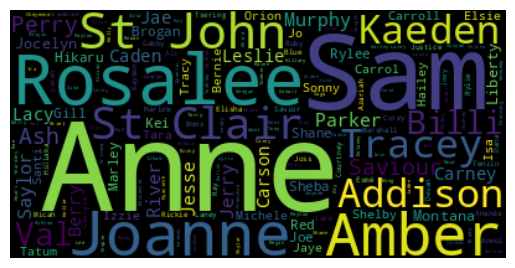

In [ ]:


wordcloud = WordCloud().generate(compiled_all_names)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
compiled_all_names_list = compiled_all_names.split(" ")
compiled_all_names_unique = list(set(compiled_all_names_list))
print(len(compiled_all_names_list))
print(len(compiled_all_names_unique))


11929
5710
